# CEAD ML project on the Ringenprinter. 
#### Welcome to the Notebook in which the petg30gf_22-11-02.csv dataset is being corrected for several flaws. 

#### Material: PET-G 30% Glass Fiber
#### Dataset: PETG30GF grote set!, 02-11-2022

Flaws:
- Filtering and smoothing time series
- decreasing average bead width due to wearing plate surface. 
- trimming dataset to fit data linear relation to line. 



## Imports and Settings

In [1]:
# imports
# system related
import sys
import subprocess

# basics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from datetime import datetime, time

# ml related
import sklearn as sk
# (not yet needed) 
# import torch
# import torch.nn as nn

# import scripts and functions
from functions import *

print('imports succesfull')

imports succesfull


In [2]:
# settings of pandas, usefull for data exploration
pd.options.display.width = 0
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)
# if reset is required:
# pd.reset_option('all')

# increasing standard image size
matplotlib.rcParams['figure.figsize'] = (14, 7)

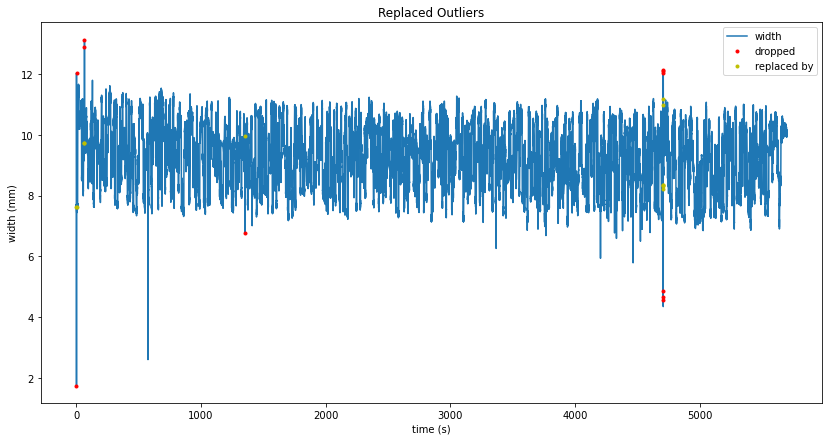

outliers detected and replaced
data median filtered
index reset

import and preprocessing data succesfull


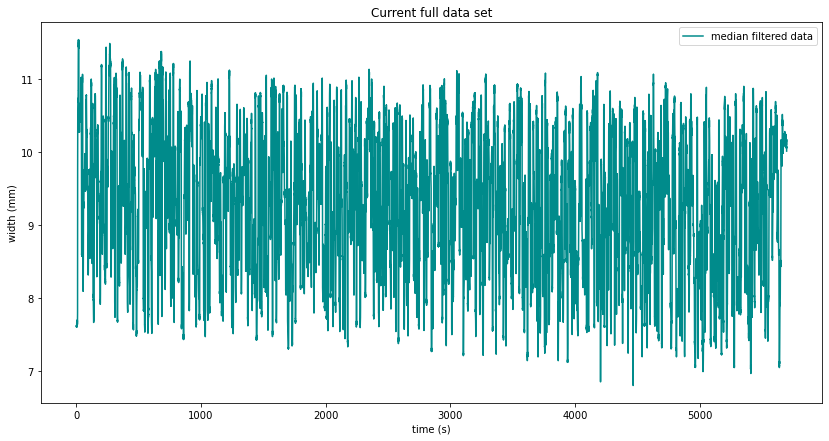

In [3]:
# Defining import variables, _s stands for small
loc_s = '../data/petg30gs-2022-11-02.csv'
start_s = 1667393458.05
end_s = 1667399157.2

# import, outlier replacement and median filtering on 'width' 
df = import_csv_filt(loc_s, start_s, end_s, plot_outliers=True, correct_hight = False,  outlier_window = 8)
print('\nimport and preprocessing data succesfull')

plt.plot(df.loc[:, 'time'], df.loc[:, 'width'], 'darkcyan', label='median filtered data')
plt.legend()
plt.title('Current full data set')
plt.xlabel('time (s)')
plt.ylabel('width (mm)')
plt.show()

### Notes on the dataset

**Problem:** A steady decrease in bead width over time can be observed. This is due to the wear of the plate service: it is only made of black paper and wears quite fast. (later solved by impregnating the paper with super glue)

**Solution:** Fit a line and subtract the increase from the line. 

[-8.22221741e-05] [9.49837647]


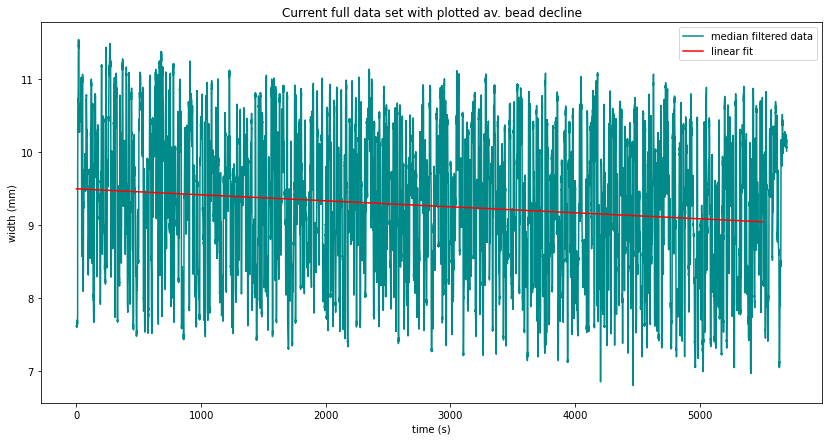

In [4]:
# imports
from sklearn.linear_model import LinearRegression

# fit data to lin regression model
fit_lin = LinearRegression().fit(np.array(df['time']).reshape(-1,1), np.array(df['width']).reshape(-1,1))

a = fit_lin.coef_[0]
b = fit_lin.intercept_

print(a, b)

timeseries = np.linspace(0, 5500)
line = timeseries * a + b

plt.plot(df.loc[:, 'time'], df.loc[:, 'width'], 'darkcyan', label='median filtered data')
plt.plot(timeseries, line, 'r', label = 'linear fit')
plt.legend()
plt.title('Current full data set with plotted av. bead decline')
plt.xlabel('time (s)')
plt.ylabel('width (mm)')
plt.show()



a, b = [1.12134814e-19], [9.49837647]


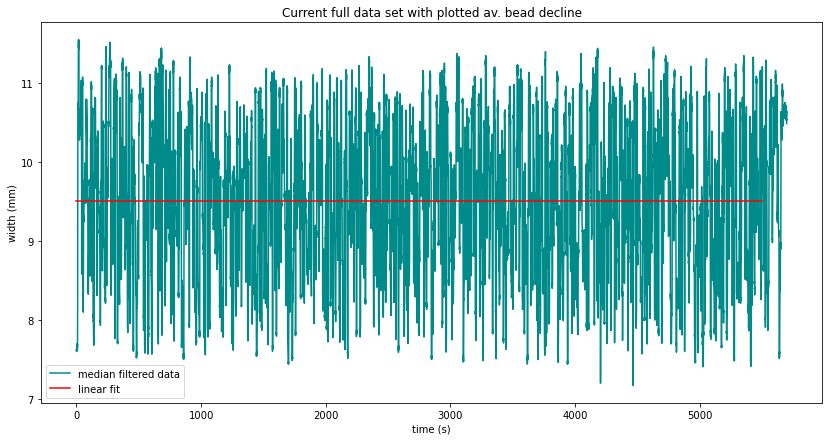

In [5]:
# Bead width correction

df['width'] = df['width'] - a * df['time']

# show it has worked:

# fit data to lin regression model
fit_lin_corr = LinearRegression().fit(np.array(df['time']).reshape(-1,1), np.array(df['width']).reshape(-1,1))

a_corr = fit_lin_corr.coef_[0]
b_corr = fit_lin_corr.intercept_

print(f'a, b = {a_corr}, {b_corr}')
line_corr = timeseries * a_corr + b_corr

plt.plot(df.loc[:, 'time'], df.loc[:, 'width'], 'darkcyan', label='median filtered data')
plt.plot(timeseries, line_corr, 'r', label = 'linear fit')
plt.legend()
plt.title('Current full data set with plotted av. bead decline')
plt.xlabel('time (s)')
plt.ylabel('width (mm)')
plt.show()

### This will now be integrated into funtions.py